In [ ]:
# LASER
!python -m laserembeddings download-models

# SENTENCE-BERT
!pip install transformers # https://github.com/huggingface/transformers
!pip install -U sentence-transformers # https://github.com/UKPLab/sentence-transformers

# UNIVERSAL SENTENCE ENCODER
!pip install tensorflow
!pip install tensorflow_hub

# FASTTEXT
!pip install fasttext

In [1]:
import seaborn as sns
import numpy as np

from models import FastText, LaserModel, SentenceBert, Tfidf, Use
from utils import get_similarity, plot_similarity, print_sentences
from arrays import same, different, same_diff, same_diff_cat, synonyms, synonym_cat, homonyms, search_sentences, search_cat, sentences, sentence_cat

## 1. Choose which model to use

Available models:
* FastText
* LaserModel
* SentenceBert
* Tfidf
* Use

In [2]:
# Choose the model to use:
model = Use()

## 2. Create vectors

In [3]:
same_vec = model.get_sentence_vec(same)
different_vec = model.get_sentence_vec(different)
same_diff_vec = model.get_sentence_vec(same_diff)
synonym_vec = model.get_sentence_vec(synonyms)
homonym_vec = model.get_sentence_vec(homonyms)
search_vec = model.get_sentence_vec(search_sentences)
sentence_vec = model.get_sentence_vec(sentences)

INFO:absl:Using /tmp/tfhub_modules to cache modules.


## 3. Semantic Search

In [4]:
scores = []

# Choose your search term
search_term = search_vec[3]

for sentence in sentence_vec:
    score = round(get_similarity(sentence, search_term),2)
    scores.append(score)

In [5]:
results = []

for (score,sentence,category) in zip(scores, sentences, sentence_cat):
    results.append([score, sentence, category])

results.sort(reverse=True)

for row in results:
    print(row[0], row[2])

0.29 SCIENCE_1
0.05 SPORTS_1
0.02 POLITICS_1
0.01 FOOD_1
0.0 POLITICS_2
-0.01 FOOD_2
-0.04 FINANCE_2
-0.05 FINANCE_1
-0.05 SCIENCE_2
-0.11 SPORTS_2


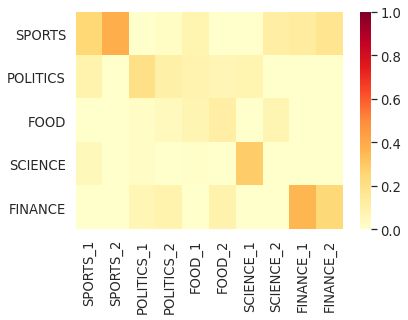

In [6]:
plot_similarity(search_cat, sentence_cat, search_vec, sentence_vec)

## 4. Synonyms and Homonyms

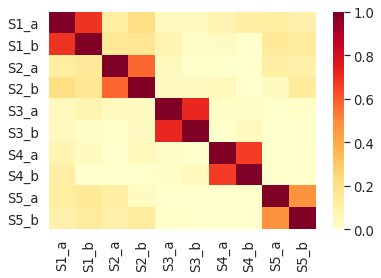

In [7]:
plot_similarity(synonym_cat, synonym_cat, synonym_vec, synonym_vec)

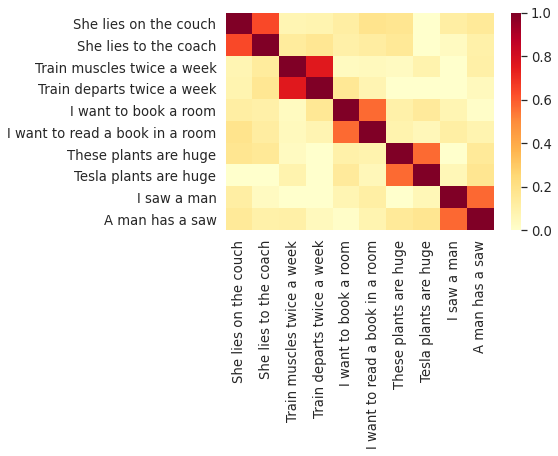

In [8]:
plot_similarity(homonyms, homonyms, homonym_vec, homonym_vec)

## 5. Same and different sentences with connecting words

The 4 first sentences have the same meaning, but different structure. The 4 last sentences have different meaning, but share words with the first 4 sentences.

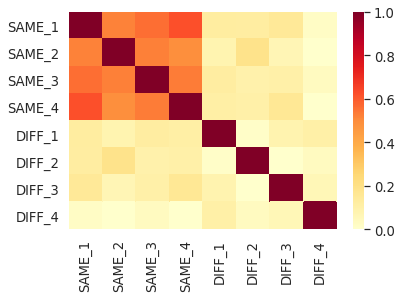

In [9]:
plot_similarity(same_diff_cat, same_diff_cat, same_diff_vec, same_diff_vec)